# Real Estate Price Prediction Project

## Part 1: Introduction

In [155]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


## Part 2: Data Cleaning

In [2]:
import pandas as pd

df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# drop several columns
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# show which columns contain 'NA' values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# because the number of NAs is 16, 73, which is relatively small compared to the dataset size of 13320,
# so let's just drop those NA values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
# column 'size' has values such as '4 Bedroom' and '2 BHK', so let's examine the column
# this shows that 'BHK' is the same as 'Bedroom'
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
# create a new column named 'bhk' that contains the number of bedrooms
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

/Users/My/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
# show the properties with more than 20 bedrooms
# this shows a property with 2400 sqft but has 43 bedrooms, which is clearly an error
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
# this shows a value which is a range '1133 - 1384' and not a single integer
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# function to determine whether a value is a float or not (maybe a range)
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
# show all the values of column total_sqft that are not float
# this shows ranges like '2100 - 2850' but also values such as '34.46Sq. Meter' and '4125Perch'
df3[~df3.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
# function to convert the ranges into numbers by taking their averages; otherwise ignore the non-range values
def range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [23]:
# test the function
range_to_num('2166')

2166.0

In [24]:
range_to_num('2100 - 2850')

2475.0

In [25]:
range_to_num('34.46Sq. Meter')

In [27]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(range_to_num)
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [28]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Part 3: Feature Engineering

In [29]:
# create new column for price per square foot
df5 = df4.copy()
df5['price_per_sqft'] = df5.price*100000 / df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
# location column is text/categorical. let's see how many values there are
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [31]:
len(df5.location.unique())

1304

In [33]:
# there's 1304 locations, which is too big for one-hot encoding
# because that would create 1304 new columns in the dataframe, or too many features
# this is the curse of dimensionality
# however, among these 1304 locations, there's several locations with just 1 or 2 data points

# remove leading and trailing spaces in location
df5.location = df5.location.apply(lambda x: x.strip())
# find out how many data points per location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
# this shows lots of locations with just 1 data point
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [34]:
# set up a threshold of 10 data points
# show how many locations with less data points than threshold
len(location_stats[location_stats <= 10])

1052

In [38]:
locations_below_threshold = location_stats[location_stats <= 10]
locations_below_threshold

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [35]:
len(df5.location.unique())

1293

In [41]:
# collect all locations with data points less than threshold into an 'Others' category
df5.location = df5.location.apply(lambda x: 'other' if x in locations_below_threshold else x)
# now there's only 242 locations left; so one-hot encoding will only produce an additional 242 columns
len(df5.location.unique())

242

In [42]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Part 4: Outlier Removal

In [43]:
# a threshold for bedroom size is 300 sqft.
# show all data with bedroom smaller than threshold
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [44]:
# remove those data points
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [45]:
# 744 rows have been removed
df5.shape

(13246, 7)

In [46]:
# get some statistics on the 'price_per_sqft' column
# this shows min PPS of 267, and max PPS of 176470
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
# function to remove price_per_sqft outliers beyond one standard deviation
def remove_pps_outliers(df):
    out_df = pd.DataFrame()
    # group dataframe by location
    for key, location_df in df.groupby('location'):
        # calculate mean and standard deviation per location
        mean = np.mean(location_df.price_per_sqft)
        std = np.std(location_df.price_per_sqft)
        # keep the location within one standard deviation from the mean
        keep_df = location_df[(location_df.price_per_sqft > mean-std) & (location_df.price_per_sqft <= mean+std)]
        # save the location
        out_df = pd.concat([out_df, keep_df], ignore_index=True)
    return out_df

In [57]:
# from 12502 to 10241: we've removed 2261 data points
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [62]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def scatter_chart(df, location):
    # create 2 dataframes at given location, one for 2-bedroom and one for 3-bedroom
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    # matplotlib.rcParams[‘figure.figsize’] = (15, 10)
    plt.figure(figsize=(15, 10))
    # plot with scatterplot
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Foot Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

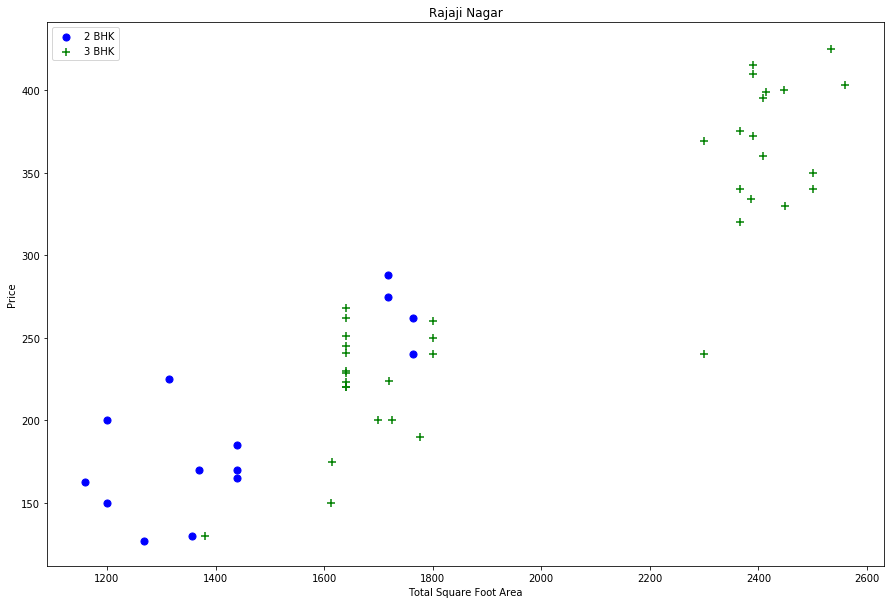

In [63]:
# this shows at 1700 sqft area, there's some 2-bedroom properties (in blue)
# that are more expensive than some 3-bedroom properties (in green)
scatter_chart(df7, 'Rajaji Nagar')

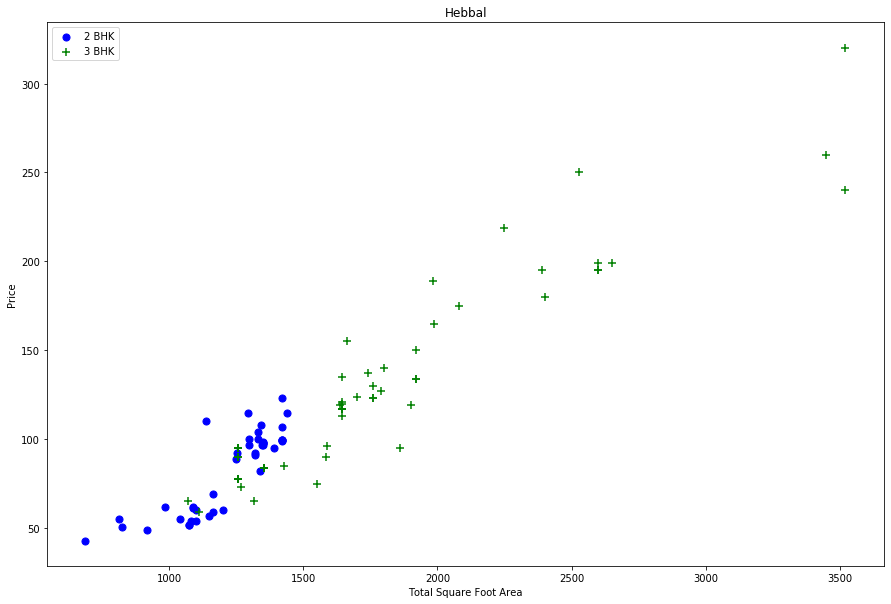

In [64]:
# also at 'Hebbal' location, at 1300-1400 sqft,
# there's some blue datapoints with higher price than green datapoints
scatter_chart(df7, 'Hebbal')

In [109]:
def remove_bhk_outliers(df):
    drop_indices = np.array([])
    
    # iterate thru location dataframe
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        # create sub-dataframe based on 'bhk'
        for bhk, bhk_df in location_df.groupby('bhk'):
            # compute and save mean, standard deviation and count
            mean = np.mean(bhk_df.price_per_sqft)
            std = np.std(bhk_df.price_per_sqft)
            count = bhk_df.shape[0]
            bhk_stats[bhk] = { 'mean':mean, 'std':std, 'count':count }

            # get the previous bhk
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                # collect datapoints with price_per_sqft value below the mean of the previous bhk.
                # e.g. if current bhk are 2-bedroom apartments, datapoints are those whose
                # price_per_sqft value are below the mean of the previous bhk, or 1-bedroom apartments
                indices = bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                
                # drop those datapoints
                drop_indices = np.append(drop_indices, indices)
    return df.drop(drop_indices, axis='index')

In [110]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

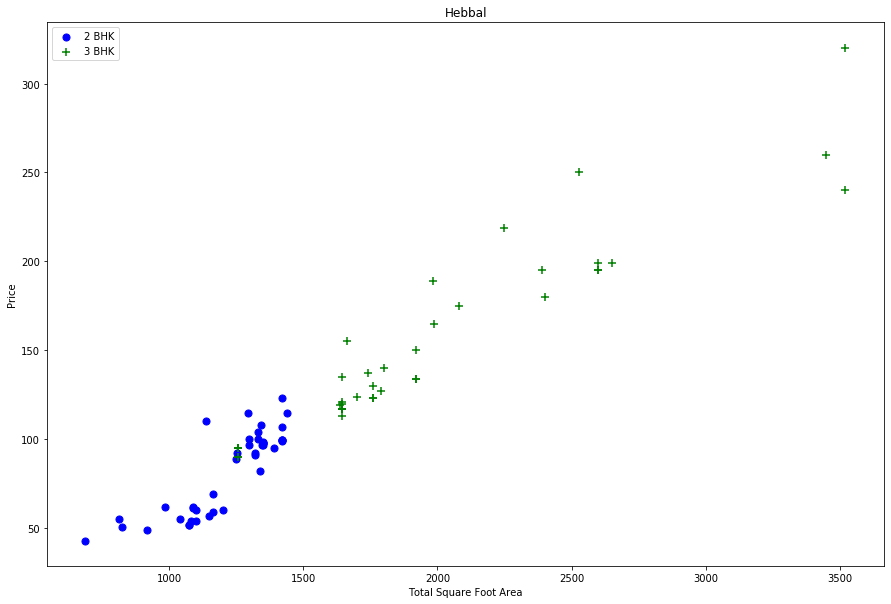

In [111]:
# chart out the improved dataframe after the price_per_sqft anomalies are removed
# notice most of the green datapoints previously mixed and stayed below the blue datapoints are now gone.
scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

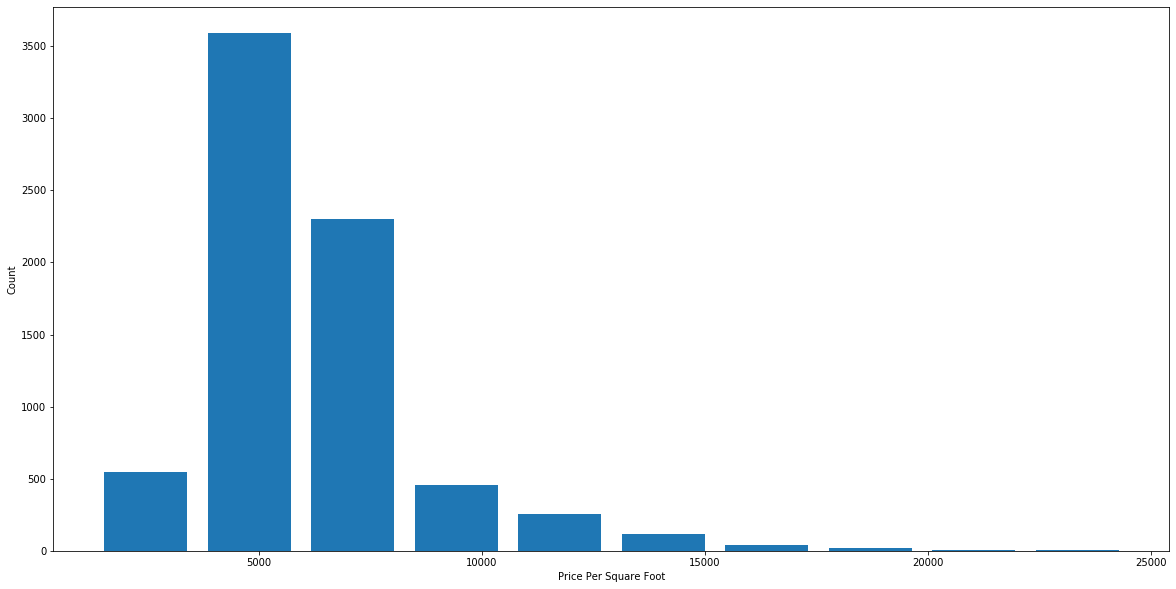

In [112]:
# this chart shows the majority of datapoints are between 0 and 10,000 rupee per square foot
plt.figure(figsize=(20, 10))
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Foot')
plt.ylabel('Count')

In [113]:
# let's explore the bathroom feature
# some property has 13 bathrooms!
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [114]:
# show properties with more than 10 bathrooms: they seem acceptable
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

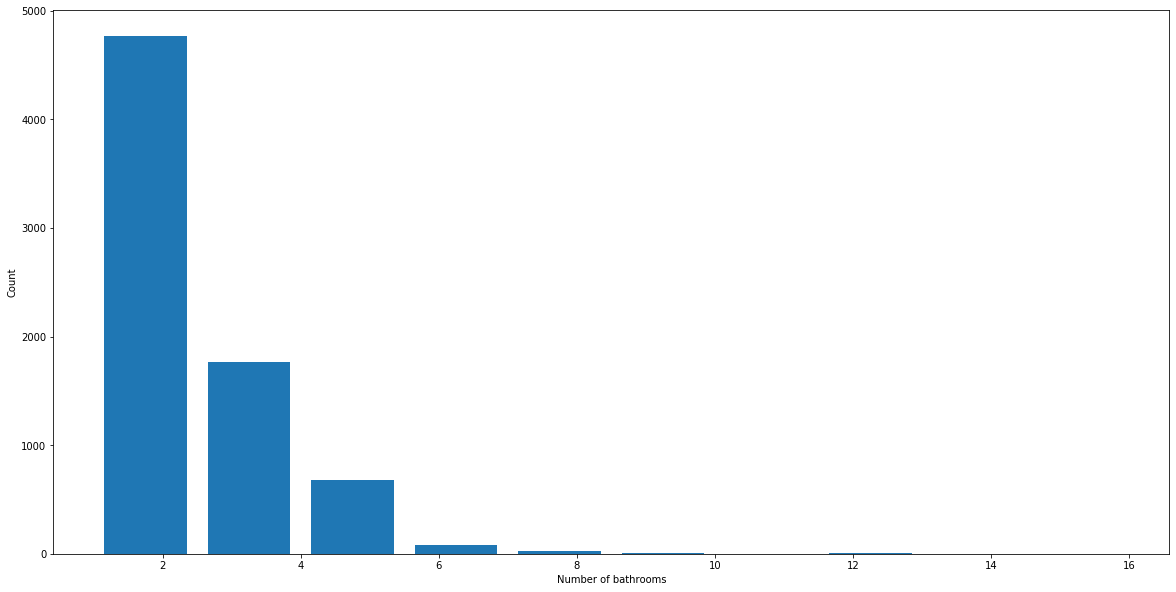

In [116]:
# this chart shows most properties has 2, 4, 6 bathrooms; the rest are outliers
plt.figure(figsize=(20, 10))
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [118]:
# criteria: outliers are properties with the number of bathrooms greater than the number of bedrooms plus 2
df8[df8.bath > df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [120]:
# remove those outliers
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7251, 7)

In [121]:
# remove unused features: size (converted to bhk) and price_per_sqft (used to detect anomalies)
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Part 5: Model Building

In [123]:
# there's still 242 different locations, to be converted into 242 new features
len(df10.location.unique())

242

In [129]:
# convert location column from text to numerical
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# drop one column (last one) to avoid dummy variable trap
dummies = dummies.drop('other', axis='columns')
# create a new dataframe with the new dummy variable columns
df11 = pd.concat([df10, dummies], axis='columns')
# drop the location column
df11 = df11.drop('location', axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# data is now clean and ready for ML modeling
df11.shape

(7251, 245)

In [132]:
X = df11.drop('price', axis='columns')
y = df11.price

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [134]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
# score of 84.52%
linear.score(X_test, y_test)

0.845227769787428

In [135]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# 4 out of 5 scores are over 80%
cross_val_score(LinearRegression(), X, y, cv=cross)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [138]:
# use GridSearchCV to select the best ML model from LinearRegression, Lasso and DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    algos = {
        'linear_regression': { 'model':LinearRegression(), 'params':{ 'normalize':[True, False] } },
        'lasso': { 'model':Lasso(), 'params':{ 'alpha':[1,2], 'selection':['random','cyclic'] } },
        'decision_tree': { 'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'], 'splitter':['best','random'] } }
    }
    
    scores = []
    # randomly shuffle the sample
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    # for each entry from algos dictionary
    for algo_name, config in algos.items():
        # run the model on the whole dataset
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        # record its scores
        scores.append({ 'model': algo_name, 'best_score': gs.best_score_, 'best_params': gs.best_params_ })

    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [139]:
# the winner is Linear Regression, with score=0.818354 and params={'normalize': False}
find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.720246,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [151]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [141]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [142]:
x = np.zeros(len(X.columns))
x.shape

(244,)

In [145]:
# with Linear Regression being the best model, let's reuse the model already created above, namely 'linear'
def predict(location, sqft, bath, bhk):
    # get the column index from the location
    # e.g. for '2nd Phase Judicial Layout', column index is 5
    column = np.where(X.columns == location)[0][0]

    # zero out all 244 columns
    x = np.zeros(len(X.columns))
    
    # recall that in X, the first 3 columns are total_sqft, bath and bhk
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # assign 1 to column at index if it's a location
    if column >= 0:
        x[column] = 1

    return linear.predict([x])[0]

In [146]:
# predict price for location='1st Phase JP Nagar', 1000 square foot, 2 bathrooms, 2 bedrooms
predict('1st Phase JP Nagar', 1000, 2, 2)

83.49904677167736

In [147]:
# predict price for location='1st Phase JP Nagar', 1000 square foot, 3 bathrooms, 3 bedrooms
predict('1st Phase JP Nagar', 1000, 3, 3)

86.80519395194287

In [148]:
# predict price for location='Indira Nagar', 1000 square foot, 2 bathrooms, 2 bedrooms
predict('Indira Nagar', 1000, 2, 2)

181.27815484007027

In [149]:
# predict price for location='Indira Nagar', 1000 square foot, 3 bathrooms, 3 bedrooms
predict('Indira Nagar', 1000, 3, 3)

184.58430202033577

In [156]:
# save model to pickle file
import pickle

with open('banglore_home_prices_model.pickle', 'wb') as file:
    pickle.dump(linear, file)

In [157]:
# export column names into JSON file
import json

columns = { 'data_columns': [column.lower() for column in X.columns] }
with open('columns.json', 'w') as file:
    file.write(json.dumps(columns))

## Part 6: Python Flask Server

Look in folder Flask_Bangalore, for:
* artifacts (folder)
  * banglore_home_prices_model.pickle
  * columns.json
* server.py
* util.py

## Part 7: Website or UI